# Berechnung eines Operationsverstärkers 
Der OP ist als einfaches Ersatzschaltbild modelliert, er hat eine Eingangsimpedanz zwischen dem negativen und positiven Eingang, eine Ausgangsimpledanz und eine endliche Verstärkung

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Hier ist nun die Funktion des Operatiosverstärkers, es gibt zwei mögliche Spannungsquellen mit Innenwiderstand 
und eine Rückkopplung R2 zwischen Ausgang und neg. Eingang und R1 als Widerstand zwischen neg. Eingang und der Quelle U10-R1. 
Siehe auch 

![Schaltbild des rückgekoppelten OPV](op_amp_real.png)

$\begin{pmatrix}
G_L+G_2+Y_a& -G_2+vY_a& -vY_a\\
-G_2&G_1'+Y_i+G_2&-Y_i\\
0&-Y_i&Y_i+G_{20}
\end{pmatrix}
\begin{pmatrix}U_1\\U_2\\U_3\end{pmatrix}=
\begin{pmatrix}0\\U_{10}G_1'\\U_{20}G_{20}\end{pmatrix}
$

Wobei generell $G=1/R$ und $Y=1/Z$ meint und speziell $G_1'=\frac{1}{R_1+R_{10}}$ ist.

Beachte, dass aufgrund der Python-Zählung der Arrays im Ergebnis $U_1=U[0], U_2=U[1], U_3=U[2]$ ist.



In [2]:
'''Funktion für einen Verstärker mit zwei Quellen und RückkoppelNW am negativen Eingang
Defaults sind so gewählt, dass ein invertierender Verstärker dabei heraus kommt'''
def op_amp(R1,R2,RL=10,U10=0.01,U20=0,v=1000000,Zi=10e6,Za=10,R10=10,R20=20,U1max=1000000):
    G2=1/R2
    G20=1/R20
    G1s=1/(R1+R10)
    Ya=1/Za
    Yi=1/Zi
    GL=1/RL
    
    Y=np.array([[GL+G2+Ya,-G2+v*Ya,-v*Ya],
              [-G2,G1s+Yi+G2,-Yi],
               [0,-Yi,Yi+G20]])
    I=np.array([0,G1s*U10,G20*U20])
    U=np.linalg.solve(Y,I)
    U[0]=min(U[0],U1max)
    U[0]=max(U[0],-U1max)
    
    return U

## Einfacher Verstärker, Testen der Verstärkungen

Einfacher Test der Verstärkung (nur U10 wird gesetzt und Widerstand R2 wird variiert). Um den Verstärkungsfehler zu verändern kann man einige der anderen Parameter (Innenwiderstand der Quellen, Innenwiderstand am Ausgang des OP und Lastwiderstand variieren).


In [3]:
R1=1000
R2=[1000,2e3,5e3,10e3,20e3,50e3,100e3]
Ua=[]
# Invertierender Verstärker
for R2s in R2:
    U=op_amp(R1,R2s,U10=1,v=100e10)
    Ua.append(U[0])
print("Verstärkungen beim Invertierenden Verstärker sind ...")
for ii,u in enumerate(Ua):
    print("R1=%5.1fOhm \tR2=%5.1fOhm \tR2/R1=%5.1f :::  \tv=%5.4g"% (R1,R2[ii],R2[ii]/R1,u))
    
# Nicht-Invertierender Verstärker
Ua=[]
for R2s in R2:
    U=op_amp(R1,R2s,U10=0,U20=1,v=100e10)
    Ua.append(U[0])
print("")
print("Verstärkungen beim Nicht-Invertierenden Verstärker sind ...")
for ii,u in enumerate(Ua):
    print("R1=%5.1fOhm \tR2=%5.1fOhm \t1+R2/R1=%5.1f :::  \tv=%5.4g"% (R1,R2[ii],1+R2[ii]/R1,u))
    

Verstärkungen beim Invertierenden Verstärker sind ...
R1=1000.0Ohm 	R2=1000.0Ohm 	R2/R1=  1.0 :::  	v=-0.9901
R1=1000.0Ohm 	R2=2000.0Ohm 	R2/R1=  2.0 :::  	v=-1.98
R1=1000.0Ohm 	R2=5000.0Ohm 	R2/R1=  5.0 :::  	v=-4.95
R1=1000.0Ohm 	R2=10000.0Ohm 	R2/R1= 10.0 :::  	v=-9.901
R1=1000.0Ohm 	R2=20000.0Ohm 	R2/R1= 20.0 :::  	v=-19.8
R1=1000.0Ohm 	R2=50000.0Ohm 	R2/R1= 50.0 :::  	v=-49.5
R1=1000.0Ohm 	R2=100000.0Ohm 	R2/R1=100.0 :::  	v=-99.01

Verstärkungen beim Nicht-Invertierenden Verstärker sind ...
R1=1000.0Ohm 	R2=1000.0Ohm 	1+R2/R1=  2.0 :::  	v= 1.99
R1=1000.0Ohm 	R2=2000.0Ohm 	1+R2/R1=  3.0 :::  	v= 2.98
R1=1000.0Ohm 	R2=5000.0Ohm 	1+R2/R1=  6.0 :::  	v= 5.95
R1=1000.0Ohm 	R2=10000.0Ohm 	1+R2/R1= 11.0 :::  	v= 10.9
R1=1000.0Ohm 	R2=20000.0Ohm 	1+R2/R1= 21.0 :::  	v= 20.8
R1=1000.0Ohm 	R2=50000.0Ohm 	1+R2/R1= 51.0 :::  	v= 50.5
R1=1000.0Ohm 	R2=100000.0Ohm 	1+R2/R1=101.0 :::  	v=  100


## Unbeschalteter Verstärker (Eingang an pos. Eingang)
Dieses ist ein einfacher Komparator, wir setzen $U_{10}=0, R_1=10\Omega, R_2=10G\Omega$, damit sollte eine sehr hohe Verstärkung erzielt werden, die Spannung $U_{20}$ wird variiert

Text(0, 0.5, '$U_a$/V')

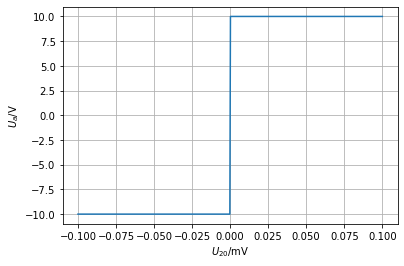

In [4]:
R1=10
R2=1e10
U1max=10
U10=0
U20max=1e-4
U20=np.linspace(-U20max,U20max,num=500)
Ua=[]
for u in U20:
    U=op_amp(R1,R2,U10=U10,U20=u,U1max=U1max,v=10e10)
    Ua.append(U[0])

plt.plot(U20*1000,Ua)
plt.grid(axis="both")
plt.xlabel("$U_{20}$/mV")
plt.ylabel("$U_a$/V")

## Frequenzabhängigkeit der Verstärkung auch mit Rückkopplung
Nun eine feste Verstärkung, aber Z_i ist eine Parallelschaltung aus Widerstand und Kondensator, also mit $Z_i=\frac{1}{G_i+i\omega C}$ und die Verstärkung ist ebenso vrequenzabhängig mit $v=\frac{v_0}{1+jf\tau}$.

Je nachdem, wie man nun die über $C_i$ die Grenzfreuqenz des RC-Gliedes relativ zum Relaxationskoeffizienten $\tau$ der Verstärkung wählt, bekommt man unterschiedliche Verläufe der Verstärkung.

Bei der Verstärkung mit Rückkopplung kann man eine Instabilität beobachten, wenn die Parameter so gewählt werden, dass die Gesamtverstärkung noch größer als 1 ist, wenn die Phasendrehung schon 0° (also 180° verschoben gegenüber $f=0$ wird.

<function matplotlib.pyplot.show(*args, **kw)>

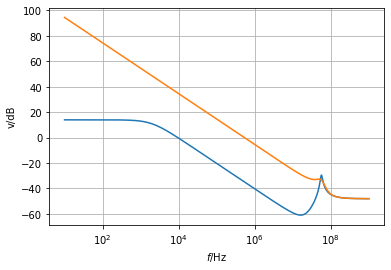

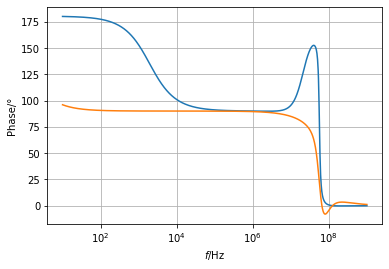

In [5]:
R1=1e3
R2=5e3

C=1e-9
R=1e6
tau=1e-3
v0=1e6
Ub=[]
Up=[]
Ubi=[]
Upi=[]

################ Für eine Simulation mit frequenzabhängigen R1 oder R2 aktivieren
C1=1e-7
C2=3e-10

freqs=np.logspace(1,9,num=1000)

for f in freqs: 
    ################ Für eine Simulation mit frequenzabhängigen R1 oder R2 aktivieren
    #R1=1/(1j*2*np.pi*f*C1)
    R2=1/(1/R2+1j*2*np.pi*f*C2)
    ################
    
    Zi=1/(1/R+2j*np.pi*f*C)
    v=v0/(1+1j*f*tau)
    
    # Verlauf ohne Rückkopplung
    # set R2 in order to demonstrate frequency compensation
    R20=1/(1j*2*np.pi*f*C2)
    #R20=R1*10*v0
    U=op_amp(R1=R1,R2=R20,U10=1,Zi=Zi,v=v)
    Ubi.append(np.abs(U[0]))
    Upi.append(np.angle(U[0])/np.pi*180)
    
    # Verlauf mit Rückkopplung
    U=op_amp(R1=R1,R2=R2,U10=1,Zi=Zi,v=v)
    Ub.append(np.abs(U[0]))
    Up.append(np.angle(U[0])/np.pi*180)

plt.figure(1)
plt.plot(freqs,20*np.log10(Ub))
plt.plot(freqs,20*np.log10(Ubi))
plt.yscale('linear')
plt.xscale('log')
plt.grid(axis="both")
plt.xlabel("$f$/Hz")
plt.ylabel("v/dB")
plt.figure(2)
plt.plot(freqs,Up)
plt.plot(freqs,Upi)
plt.yscale('linear')
plt.xscale('log')
plt.grid(axis="both")
plt.xlabel("$f$/Hz")
plt.ylabel("Phase/°")
plt.show

## Aufgaben
### Invertierender Verstärker und frequenzabhängige Schaltungen
1. Bestimmen Sie den Eingangswiderstand des Invertierenden Verstärkers! Analytisch in der idealen Schaltung, wie bekommt man diesen Wert aus der Simulation heraus?
1. Simulieren Sie einen Spannungsverlauf (z.B. Sinus-Signal) am Eingang und stellen Sie diesen dar.
1. Simulieren Sie die Schaltung mit frequenzabhängigen $R_1$ und $R_2$, also bspw. einer der Widerstände ist eine Kapazität oder die Widerstände sind RC-Glieder oder gerne auch RL-Glieder. Wie ist das Ergebnis, was für (mathematische) Operationen werden ausgeführt.
### Nicht-Invertierender Verstärker
1. Simulieren Sie den Nicht-Invertierenden Verstärker und bestimmen Sie auch hier Frequenzgang und Innenwiderstand
### Vergleichende Aufgaben
1. Analysieren Sie den Einfluss des Innenwiderstandes einer Quelle im Invertierenden und Nicht-Invertierenden Verstärker! Wo ist der Einfluss größer, ab welchem Wert (relativ zu $R_1$) wird der Verstärkungsfehler größer als 10%?


In [6]:
# Eingangswiderstand des invertierenden Verstärkers bestimmen
R1=2e3
R2=10e3
R10=10
U10=1
U=op_amp(R1=R1,R2=R2,R10=R10,U10=U10)
# Strom aus der Quelle U10 heraus ist damit
I10=(U10-U[1])/(R1+R10)
Ri=U10/I10-R10
print("Spannung an Knoten 2 ist %5.1eV, Stromstärke ist %5.1gA"% (U[1],I10))
print("Der Eingangswiderstand ist %5.1f$\Omega$"% Ri)

Spannung an Knoten 2 ist 1.0e-05V, Stromstärke ist 0.0005A
Der Eingangswiderstand ist 2000.0$\Omega$


Spannung an Knoten 3 ist 1.0e+00V, Stromstärke ist 1e-08A
Der Eingangswiderstand ist 8.4e+07Ohm


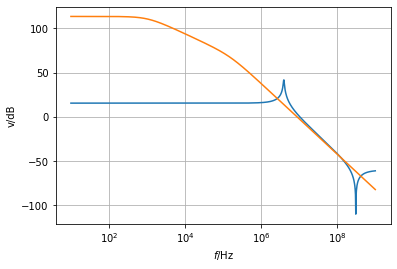

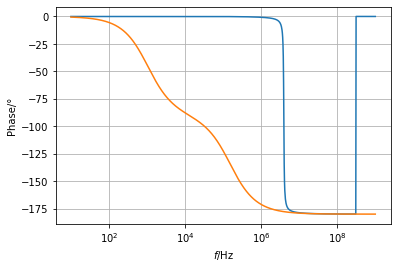

In [7]:
# Für den Nicht-Invertierenden Verstärker muss man nur die Eingänge vertauschen, 
# d.h. U10=0 und U20 läuft durch
R1=1e3
R2=5e3

C=1e-9
R=1e6
tau=1e-3
v0=1e6
Ub=[]
Up=[]
Ubi=[]
Upi=[]

freqs=np.logspace(1,9,num=1000)

for f in freqs: 
    
    Zi=1/(1/R+2j*np.pi*f*C)
    v=v0/(1+1j*f*tau)
    
    # Verlauf ohne Rückkopplung
    U=op_amp(R1=R1,R2=R1*10*v0,U10=0,U20=1,Zi=Zi,v=v)
    Ubi.append(np.abs(U[0]))
    Upi.append(np.angle(U[0])/np.pi*180)
    
    # Verlauf mit Rückkopplung
    U=op_amp(R1=R1,R2=R2,U10=0,U20=1,Zi=Zi,v=v)
    Ub.append(np.abs(U[0]))
    Up.append(np.angle(U[0])/np.pi*180)

plt.figure(1)
plt.plot(freqs,20*np.log10(Ub))
plt.plot(freqs,20*np.log10(Ubi))
plt.yscale('linear')
plt.xscale('log')
plt.grid(axis="both")
plt.xlabel("$f$/Hz")
plt.ylabel("v/dB")
plt.figure(2)
plt.plot(freqs,Up)
plt.plot(freqs,Upi)
plt.yscale('linear')
plt.xscale('log')
plt.grid(axis="both")
plt.xlabel("$f$/Hz")
plt.ylabel("Phase/°")
plt.show

# Der Innenwiderstand wird auch wieder bestimmt durch
R20=10
U20=1
Zi=10e2
U=op_amp(R1=R1,R2=R2,R20=R20,U10=0,U20=U20,Zi=Zi)
# Strom aus der Quelle U10 heraus ist damit
I20=(U20-U[2])/R20
Ri=U20/I20-R20
print("Spannung an Knoten 3 ist %5.1eV, Stromstärke ist %5.1gA"% (U[2],I20))
print("Der Eingangswiderstand ist %5.1eOhm"% Ri)


<function matplotlib.pyplot.show(*args, **kw)>

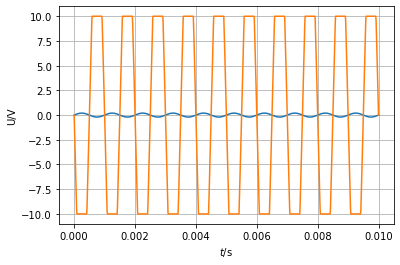

In [8]:
# Simulation einer zeitlichen Funktion (nicht komplex [natürlich!!!])
# Beachte, dass obwohl es eine Berechnung im Zeitbereich ist, keine
# Effekte wie endliche Slew-Rate oder Ladungsspeicherungen (Kapazitäten) usw.
# mit simuliert werden können. Letztlich ist es nur das stationäre (DC) Modell,
# das hier im Zeitbereich bemüht wird.

R1=1e3
R2=100e3

C=1e-9
R=1e6
v=1e6
Uout=[]
Uin=[]
U10max=200e-3
f=1e3

tmax=10e-3
tim=np.linspace(0,tmax,num=1000)

for t in tim: 
    
    U10=U10max*np.sin(2*np.pi*f*t)
    Uin.append(U10)
    
    # Verlauf mit Rückkopplung
    U=op_amp(R1=R1,R2=R2,U10=U10,v=v,U1max=10)
    Uout.append(U[0])

plt.figure(1)
plt.plot(tim,Uin)
plt.plot(tim,Uout)
plt.grid(axis="both")
plt.xlabel("$t$/s")
plt.ylabel("U/V")
plt.show